# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sinasc.csv')
df.head(10)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,5,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
6,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,...,5,7,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446
7,1,2516500.0,110001,1,27,2.0,12 anos ou mais,514120.0,0.0,0.0,...,5,8,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
8,1,2679477.0,110001,1,20,5.0,8 a 11 anos,621005.0,0.0,1.0,...,2,9,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
9,1,2679477.0,110001,1,30,2.0,1 a 3 anos,999992.0,1.0,1.0,...,5,10,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

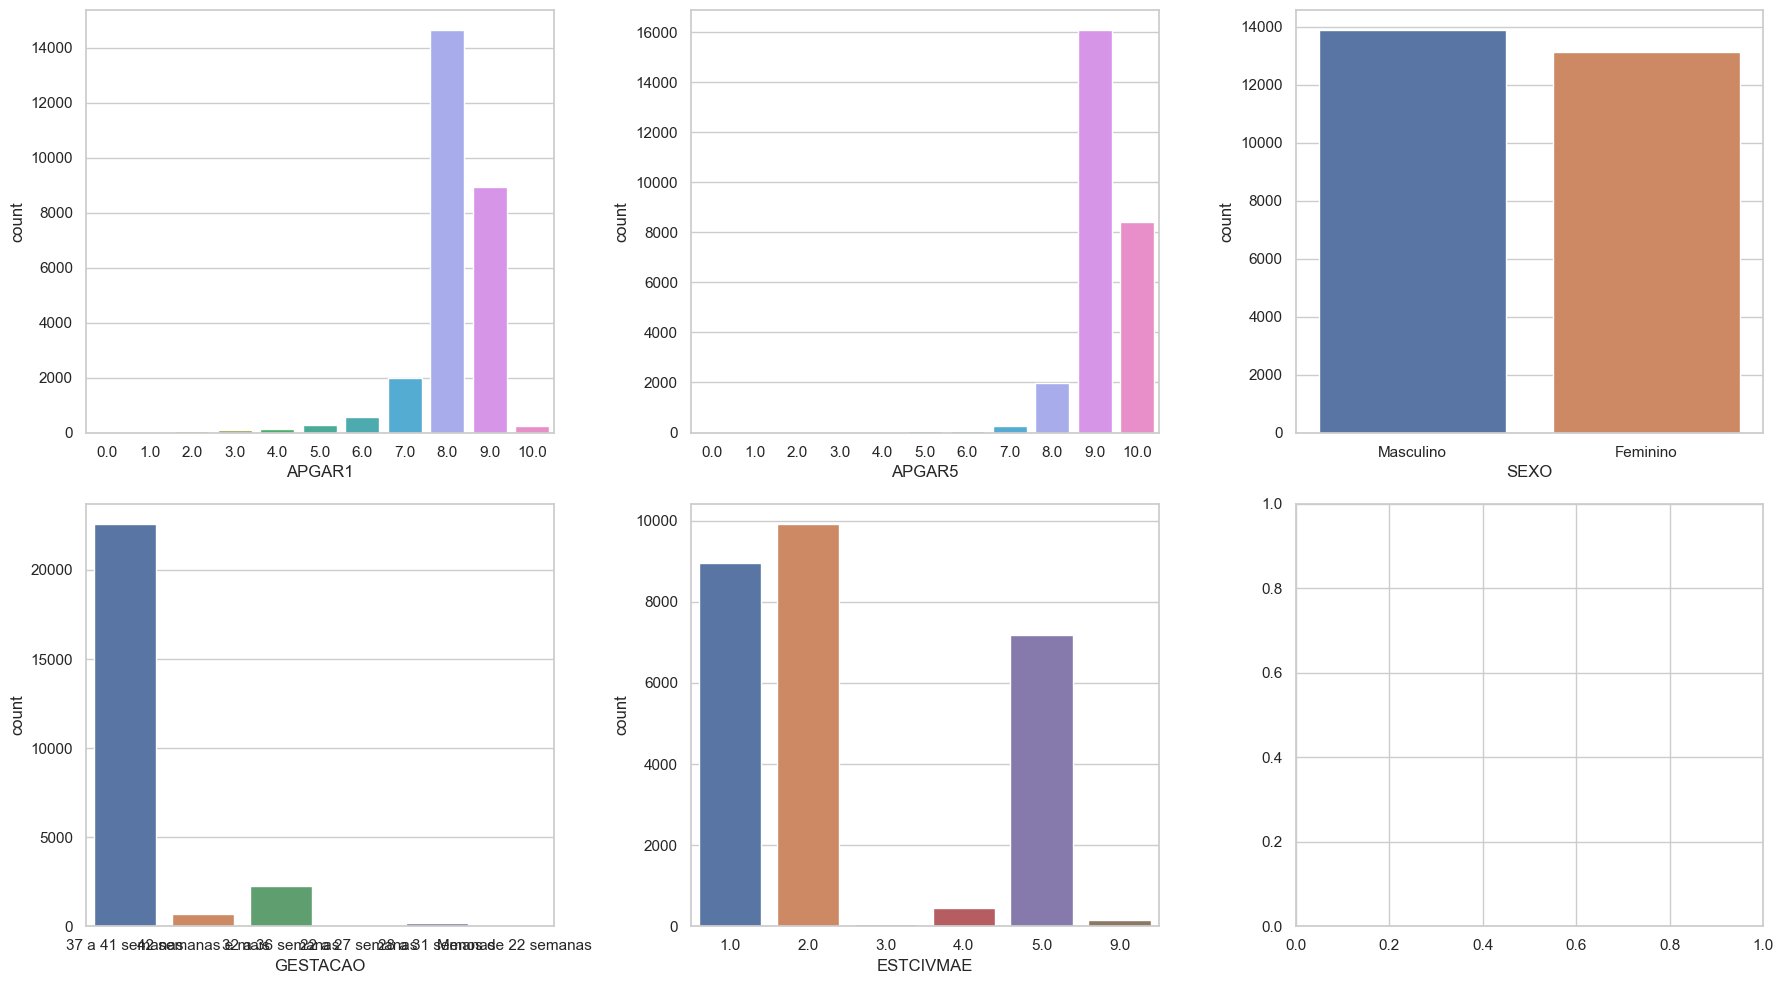

In [20]:
# Configurar o estilo do Seaborn - SET configurar parâmetros globais, style é aparência, whitegrid "Grade Branca"
sns.set(style="whitegrid")

# Criar uma matriz de subplots (2 linhas e 3 colunas)
#função plt.subplots retorna = Figura geral (fig) e Matriz de Subplots (axes), 2 linhas, 3 colunas, largura x altura
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Criar um gráfico de barras para APGAR1
#sns.countplot = criar gráfico de contagem, a partir de observações em cada categoria da variavel
#ax = axes [0,0] = em qual eixo vai ser cirado, x= qual coluna vai ser utilizada, data= de qual dataframe sera feito
sns.countplot(ax=axes[0, 0], x='APGAR1', data=df)

# Criar um gráfico de barras para APGAR5
sns.countplot(ax=axes[0, 1], x='APGAR5', data=df)

# Criar um gráfico de barras para SEXO
sns.countplot(ax=axes[0, 2], x='SEXO', data=df)

# Criar um gráfico de barras para GESTACAO
sns.countplot(ax=axes[1, 0], x='GESTACAO', data=df)

# Criar um gráfico de barras para ESTCIVMAE
sns.countplot(ax=axes[1, 1], x='ESTCIVMAE', data=df)

# Ajustar automaticamente o layout para evitar sobreposição
plt.tight_layout()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

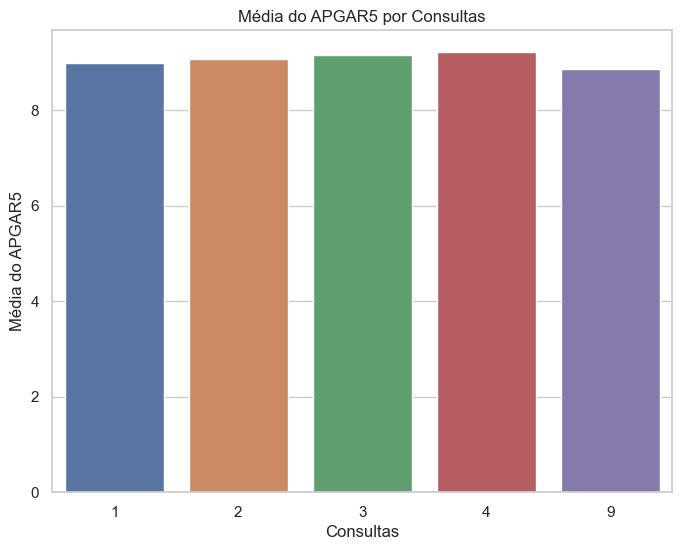

In [27]:
#Fazendo a média da coluna Apgar5 correspondente para cada grupo de consultas
media_apgar5 = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

#Criando a imagem:
plt.figure(figsize=(8, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=media_apgar5, errorbar=None)


#Modificando os titulos do Grafico:
plt.xlabel('Consultas')
plt.ylabel('Média do APGAR5')
plt.title('Média do APGAR5 por Consultas')

plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

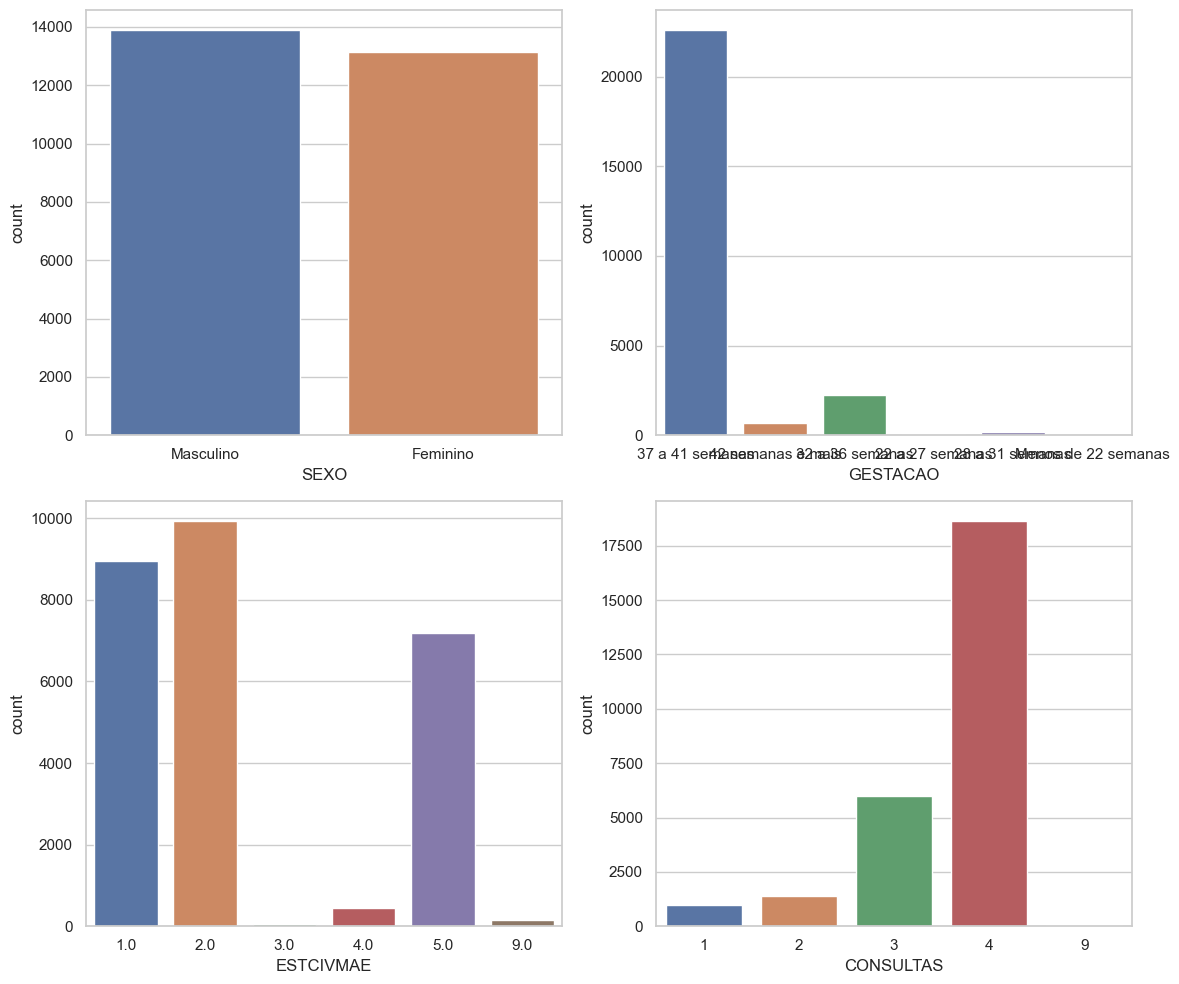

In [37]:
#style do Grafico
sns.set(style="whitegrid")

#Tamanho do grafico
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10 ))

#adicionando as informações em cada grafico
sns.countplot(ax = axes[0,0], x='SEXO',data=df) 
sns.countplot(ax = axes[0,1], x='GESTACAO',data=df)
sns.countplot(ax = axes[1,0], x='ESTCIVMAE',data=df) 
sns.countplot(ax = axes[1,1], x='CONSULTAS',data=df) 

#ajustando layout automaticamente:
plt.tight_layout()

#mostrando
plt.show()